# Experiment the Central Limit Theorem

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
np.random.seed(42)

In [15]:
pop_size = 100_000
population = np.random.exponential(scale=1.0, size=pop_size)
pop_mean = population.mean()
pop_std = population.std(ddof=0)

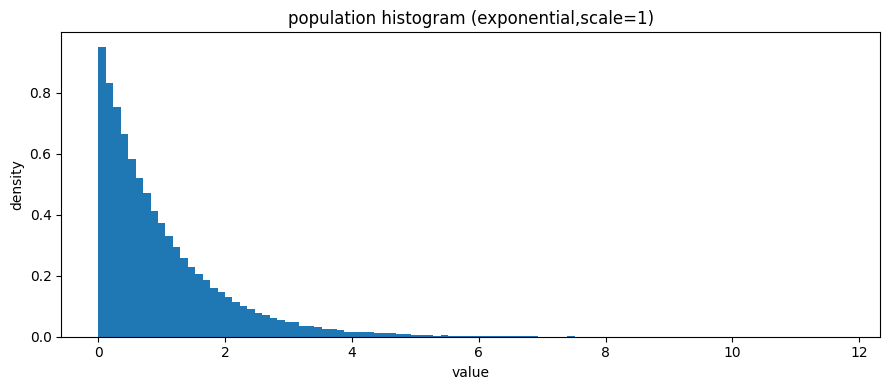

In [16]:
plt.figure(figsize=(9,4))
plt.hist(population,bins=100,density=True)
plt.title('population histogram (exponential,scale=1)')
plt.xlabel('value')
plt.ylabel('density')
plt.tight_layout()
plt.show()

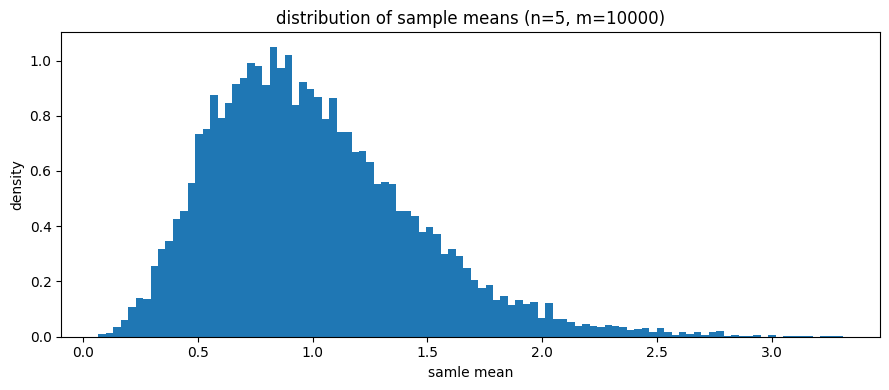

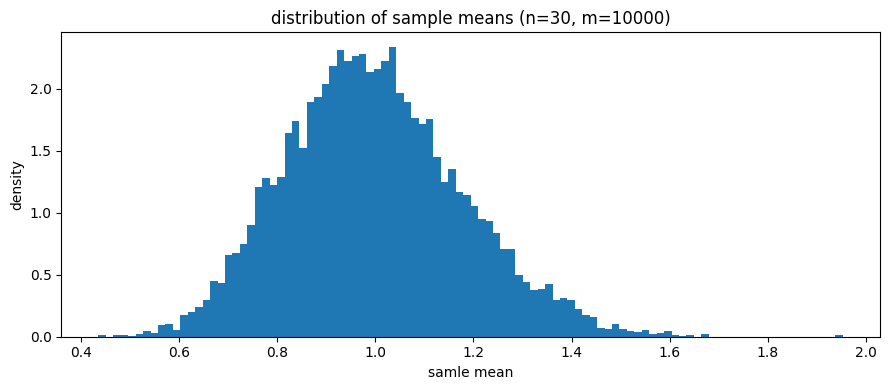

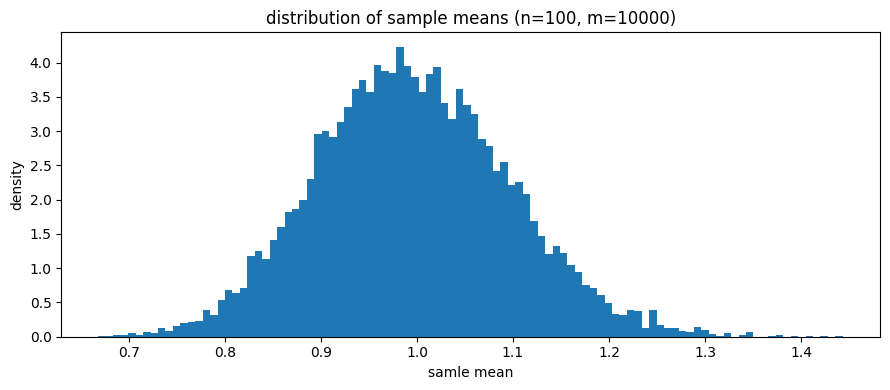

In [17]:
m = 10_000
ns = [5,30,100]
res = {}
for n in ns:
    samples = np.random.choice(population,size=(m,n),replace=True)
    sample_means = samples.mean(axis=1)
    res[n] = sample_means

    plt.figure(figsize=(9,4))
    plt.hist(sample_means,bins=100,density=True)
    plt.title(f'distribution of sample means (n={n}, m={m})')
    plt.xlabel('samle mean')
    plt.ylabel('density')
    plt.tight_layout()
    plt.show()

# Experiment the Law of Large Numbers

In [18]:
pop2 = np.random.exponential(scale=2.0,size=200_000)
pop2_mean = pop2.mean()

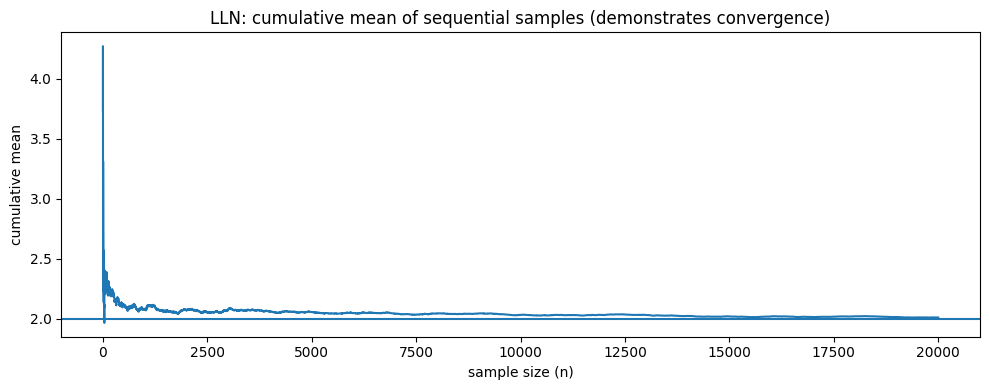

In [19]:
seq_len = 20_000
sample_seq = np.random.choice(pop2,size=seq_len,replace=True)
cml_mean = np.cumsum(sample_seq)/np.arange(1,seq_len+1)

plt.figure(figsize=(10,4))
plt.plot(cml_mean)
plt.axhline(pop2_mean)
plt.title('LLN: cumulative mean of sequential samples (demonstrates convergence)')
plt.xlabel('sample size (n)')
plt.ylabel('cumulative mean')
plt.tight_layout()
plt.show()

In [20]:
check_ns = [1,2,5,10,50,100,500,1000,5000,10000,20000]
sample_means_table = []
for n in check_ns:
    sm = np.mean(np.random.choice(pop2,size=n,replace=True))
    sample_means_table.append({'n':n,'sample_mean':float(sm)})
df = pd.DataFrame(sample_means_table)

In [21]:
print(df)

        n  sample_mean
0       1     3.002308
1       2     0.421932
2       5     4.889196
3      10     4.043507
4      50     1.647527
5     100     1.994243
6     500     2.023515
7    1000     2.047836
8    5000     2.044024
9   10000     1.964861
10  20000     1.981601
